In [1191]:
%reset -sf

In [1192]:
!mkdir -p output

In [1193]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict

import ortools
import networkx as nx
import graph_tool
import graph_tool.draw

# Input parsing

In [1194]:
!ls input_data

a_an_example.in.txt         d_dense_schedule.in.txt
b_better_start_small.in.txt e_exceptional_skills.in.txt
c_collaboration.in.txt      f_find_great_mentors.in.txt


In [1195]:
case_a = "a_an_example.in.txt"
case_b = "b_better_start_small.in.txt"
case_c = "c_collaboration.in.txt"
case_d = "d_dense_schedule.in.txt"
case_e = "e_exceptional_skills.in.txt"
case_f = "f_find_great_mentors.in.txt"

folder_in = "input_data/"
folder_out = "output/"

In [1196]:
# !head input_data/e_exceptional_skills.in.txt

In [1197]:
cases = [case_a, case_b, case_c, case_d, case_e, case_f]

In [1198]:
case = case_a
case = case_b
case = case_c
case = case_d
case = case_e
case = case_f

In [1199]:
!cat input_data/a_an_example.in.txt

3 3
Anna 1
C++ 2
Bob 2
HTML 5
CSS 5
Maria 1
Python 3
Logging 5 10 5 1
C++ 3
WebServer 7 10 7 2
HTML 3
C++ 2
WebChat 10 20 20 2
Python 3
HTML 3


In [1200]:
def input_parser(filename):

    with open(filename) as f:
        srr = [row.strip() for row in f.readlines()]

    ptr = 0
    c,p = [int(x) for x in srr[ptr].split()]
    ptr += 1

    name_to_skills_and_levels = defaultdict(list)

    for _ in range(c):
        name, num_skills = srr[ptr].split()
        num_skills = int(num_skills)
        ptr += 1

        for _ in range(num_skills):
            skill, skill_level = srr[ptr].split()
            skill_level = int(skill_level)
            ptr += 1

            name_to_skills_and_levels[name].append((skill, skill_level))

    project_to_days_needed = {}
    project_to_score_given = {}
    project_to_best_before = {}
    project_to_skills_and_skill_levels = defaultdict(list)
    
    # augmented info
    project_to_people_needed = {}
    project_to_people_days_needed = {}
    project_to_unique_skills_needed = {}

    for _ in range(p):
        project_name, d, s, b, r = srr[ptr].split()
        ptr += 1

        project_to_days_needed[project_name] = int(d)
        project_to_score_given[project_name] = int(s)
        project_to_best_before[project_name] = int(b)

        for _ in range(int(r)):
            skill, skill_level_required = srr[ptr].split()
            skill_level_required = int(skill_level_required)
            ptr += 1

            project_to_skills_and_skill_levels[project_name].append((skill, skill_level_required))
                        
        # aug
        project_to_people_needed[project_name] = \
            len(project_to_skills_and_skill_levels[project_name])
        
        project_to_people_days_needed[project_name] = \
            project_to_days_needed[project_name] * project_to_people_needed[project_name]
        
        project_to_unique_skills_needed[project_name] = len(
            set(x[0] for x in project_to_skills_and_skill_levels[project_name]))
    
    return (name_to_skills_and_levels,
            project_to_days_needed,
            project_to_score_given,
            project_to_best_before,
            project_to_skills_and_skill_levels,
            project_to_people_needed, 
            project_to_people_days_needed,  
            project_to_unique_skills_needed)

In [1201]:
# g++ -std=c++17 checker.cpp -o checker && ./checker 

In [1202]:
# i.e. they need to have 

In [1203]:
name_to_skills_and_levels, \
project_to_days_needed, \
project_to_score_given, \
project_to_best_before, \
project_to_skills_and_skill_levels, \
project_to_people_needed, \
project_to_people_days_needed, \
project_to_unique_skills_needed = input_parser(folder_in + case)

In [1204]:
print(case)

project_days = 0
for project in project_to_skills_and_skill_levels:
    people_needed = len(project_to_skills_and_skill_levels[project])
    days_needed = project_to_days_needed[project]
    project_days += people_needed*days_needed

project_days_needed = project_days
print("total project-days needed", project_days)

project_days = 0
for project in project_to_skills_and_skill_levels:
    people_needed = len(project_to_skills_and_skill_levels[project])
    days_needed = project_to_best_before[project]
    project_days += people_needed*days_needed

print("total project-days available", project_days)

print("ratio", project_days_needed/project_days)

f_find_great_mentors.in.txt
total project-days needed 358542004
total project-days available 12306416362
ratio 0.029134558221767404


In [1205]:
print("number of contributors", len(name_to_skills_and_levels))
print("number of projects", len(project_to_days_needed))

number of contributors 1000
number of projects 19413


f_find_great_mentors.in.txt


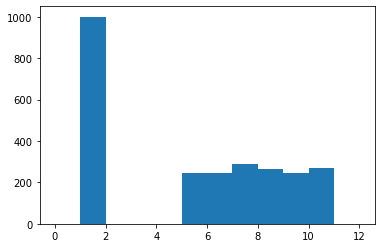

In [1206]:
print(case)
skill_levels = []
for name, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        skill_levels.append(level)
plt.hist(skill_levels, bins=range(max(skill_levels) + 3))
plt.show()

f_find_great_mentors.in.txt


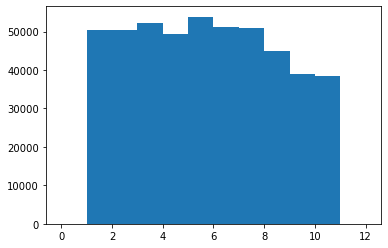

In [1207]:
print(case)
skill_levels = []
for name, skills_and_levels in project_to_skills_and_skill_levels.items():
    for skill, level in skills_and_levels:
        skill_levels.append(level)
plt.hist(skill_levels, bins=range(max(skill_levels) + 3))
plt.show()

f_find_great_mentors.in.txt


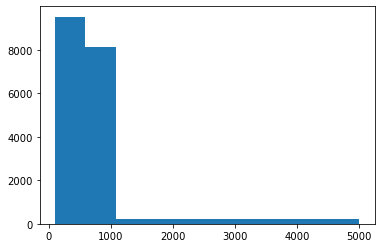

In [1208]:
print(case)
plt.hist(project_to_days_needed.values())
plt.show()

f_find_great_mentors.in.txt


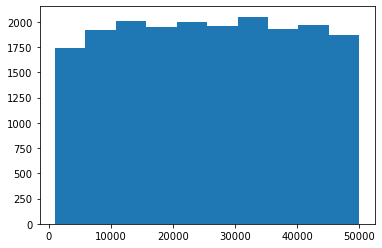

In [1209]:
print(case)
plt.hist(project_to_best_before.values())
plt.show()

f_find_great_mentors.in.txt
9136275


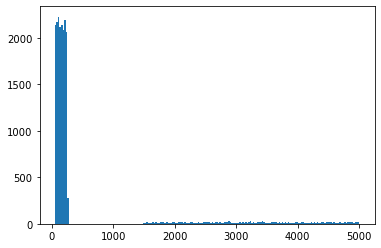

In [1210]:
print(case)
print(sum(project_to_score_given.values()))
plt.hist(project_to_score_given.values(), bins=200)
plt.show()

f_find_great_mentors.in.txt


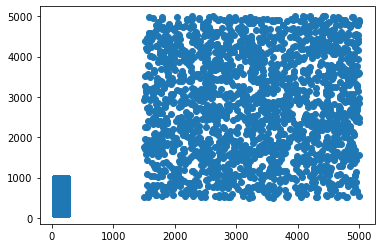

In [1211]:
print(case)
# x - project_to_score_given 
# y - project_to_days_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_score_given.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_days_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


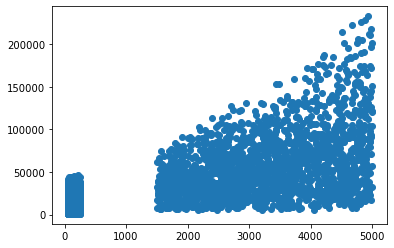

In [1212]:
print(case)
# x - project_to_score_given 
# y - project_to_people_days_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_score_given.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_people_days_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


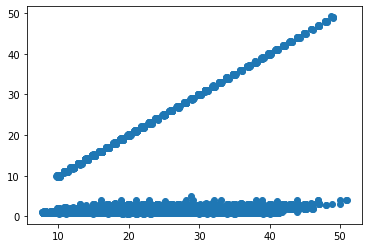

In [1213]:
print(case)
# x - project_to_people_needed 
# y - project_to_unique_skills_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_people_needed.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_unique_skills_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


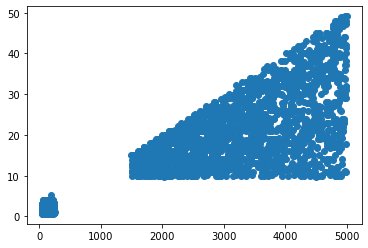

In [1214]:
print(case)
# x - project_to_score_given 
# y - project_to_unique_skills_needed 
n = len(list(project_to_score_given.values()))
plt.scatter(np.array(list(project_to_score_given.values())) + np.random.randn(n)/10, 
            np.array(list(project_to_unique_skills_needed.values())) + np.random.randn(n)/10)
plt.show()

f_find_great_mentors.in.txt


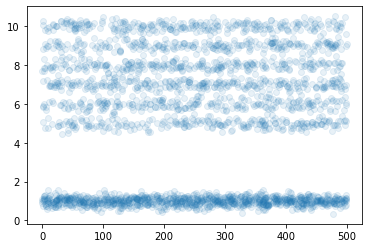

In [1215]:
print(case)
all_skills = set()
for name, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        all_skills.add(skill)

skill_to_idx = {x:i for i,x in enumerate(all_skills)}
        
# x - skill_idx 
# y - skill level
    
xx, yy = [], []
for name, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        xx.append(skill_to_idx[skill])
        yy.append(level)

n = len(list(xx))
plt.scatter(np.array(xx) + np.random.randn(n)/5, 
            np.array(yy) + np.random.randn(n)/5, alpha=0.1)
plt.show()

In [1061]:
# # pretty messy when large

# for idx in reversed(sorted(G.get_vertices())):
#     if G.vertex(idx).out_degree() > 7:
#         G.remove_vertex(idx)

# for idx in reversed(sorted(G.get_vertices())):
#     if G.vertex(idx).out_degree() == 0:
#         G.remove_vertex(idx)

# # pos = graph_tool.draw.random_layout(G)
# graph_tool.draw.graph_draw(G)
# plt.show()

# Upper bound analysis

In [1062]:
# see Codeforces comment
# probably not gonna do for this practice
# also unlikely to do such complicated analysis in qualifiers

# Scoring

In [1063]:
!ls output

adhoc.ipynb                 d_difficult.0000001420
c_coarse.0000000005         e_exceptional_skills.in.txt
c_coarse.in.txt.0000000005  output.txt


In [1066]:
# ourput_parser(folder_out + case)

In [1067]:
output_filename = folder_out + "e_exceptional_skills.in.txt"
output_filename = folder_out + "output.txt"

def output_parser(output_filename):

    ordered_project_and_teammates = []
    ptr = 0
    with open(output_filename) as f:
        srr = f.read().strip().split("\n")

    num_projects = int(srr[ptr])
    ptr += 1
    assert len(srr) == num_projects*2 + 1

    for _ in range(num_projects):
        project = srr[ptr]
        ptr += 1

        teammates = srr[ptr].split()
        ptr += 1
        ordered_project_and_teammates.append((project, teammates))
    
    return ordered_project_and_teammates

In [1068]:
!ls output

adhoc.ipynb                 d_difficult.0000001420
c_coarse.0000000005         e_exceptional_skills.in.txt
c_coarse.in.txt.0000000005  output.txt


In [1069]:
case

'f_find_great_mentors.in.txt'

In [1190]:
# name_to_skills_and_levels

In [1071]:
name_to_skills_and_levels, \
project_to_days_needed, \
project_to_score_given, \
project_to_best_before, \
project_to_skills_and_skill_levels, \
project_to_people_needed, \
project_to_people_days_needed, \
project_to_unique_skills_needed = input_parser(folder_in + case)

# output_filename = folder_out + "output.txt"
# output_filename = folder_out + "e_exceptional_skills.in.txt"

# ordered_project_and_teammates = output_parser(output_filename)

person_to_available_date = {name:0 for name in name_to_skills_and_levels}

person_and_skill_to_level = defaultdict(int)
for person, skills_and_levels in person_and_skill_to_level.items():
    for skill, level in skills_and_levels:
        person_and_skill_to_level[person, skill] = level

# for project, teammates in ordered_project_and_teammates:
#     # check individual allocation is ok
    
#     for person, (skill, skill_level) in zip(teammates, project_to_skills_and_skill_levels[project]):
#         assert person_and_skill_to_level[person, skill] + 1 >= skill_level        

# def scoring(crr):
#     crr = set(crr)
#     res = 0
#     for a,b in zip(arr,brr):
        
#         all_included = set(a) & crr == set(a)
#         all_excluded = set(b) & crr == set()

#         if all_included and all_excluded:
#             res += 1
#     return res

# scoring(list(always_include))

In [1072]:
# output_filename = folder_out + "output.txt"
# output_filename = folder_out + "e_exceptional_skills.in.txt"

# ordered_project_and_teammates = output_parser(output_filename)

In [1073]:
from sortedcontainers import SortedList

In [1074]:
name_to_skills_and_levels, \
project_to_days_needed, \
project_to_score_given, \
project_to_best_before, \
project_to_skills_and_skill_levels, \
project_to_people_needed, \
project_to_people_days_needed, \
project_to_unique_skills_needed = input_parser(folder_in + case)

all_skills = set()
for name, skills_and_levels in name_to_skills_and_levels.items():
    for skill, level in skills_and_levels:
        all_skills.add(skill)

person_to_available_date = {name:0 for name in name_to_skills_and_levels}

skill_and_level_to_person = defaultdict(SortedList)
for person, skills_and_levels in name_to_skills_and_levels.items():

    for skill, level in skills_and_levels:
        skill_and_level_to_person[skill, level].add((0, person))
        person_skill = set()
        person_skill.add(skill)
    
    for skill in all_skills:
        if skill not in person_skill:
            skill_and_level_to_person[skill, 0].add((0, person))

In [1075]:
# maintain only person_to_available_date, skill_and_level_to_person

In [1077]:
len(all_skills)

500

In [1078]:
completed_projects = set()
project_and_people = []

In [1079]:
# completed_projects = set()
# project_and_people = []

for _ in range(100):
# consider all training projects    
    for project in project_to_days_needed:
    #     if project_to_days_needed[project] > 1000:
    #         continue

    #     if project_to_unique_skills_needed[project] > 1:
    #         continue
    
        if project in completed_projects:
            continue

        first = True
        chosen = []

        for skill, level in project_to_skills_and_skill_levels[project]:
            earliest = 10**18

            # find earliest available person that is not chosen
            for level_query in range(level, 25):

                # from a certain level
                idx = 0
                while len(skill_and_level_to_person[skill, level_query]) > idx \
                            and skill_and_level_to_person[skill, level_query][idx][0] < earliest:

                    # update available timing
                    available, person = skill_and_level_to_person[skill, level_query][idx]
                    if person_to_available_date[person] != available:
                        del skill_and_level_to_person[skill, level_query][idx]
                        skill_and_level_to_person[skill, level_query].add((
                            person_to_available_date[person], person))
                        continue

                    if person in chosen:
                        idx += 1
                        continue

                    # if the available time is correct and not chosen

                    earliest, person_choosing = skill_and_level_to_person[skill, level_query][idx]
                    break

            if earliest != 10**18 and person_choosing not in chosen:
                chosen.append(person_choosing)

        if len(chosen) != len(project_to_skills_and_skill_levels[project]):
            continue
            
        for person in chosen:
            person_to_available_date[person] += project_to_days_needed[project]

        completed_projects.add(project)
        project_and_people.append([project, chosen])

In [1080]:
srr = []
srr.append(str(len(project_and_people)))

for project, chosen in project_and_people:
    srr.append(project)
    srr.append(" ".join(chosen))

In [1081]:
with open("output.txt", "w") as f:
    f.writelines("\n".join(srr))

In [1082]:
srr[:20]

['1692',
 'p1259',
 'c261 c771 c48 c367 c838 c205 c818 c427 c278 c661 c324 c6 c803 c37 c296 c851 c16 c409 c570 c275 c26 c133 c161 c243 c478 c18 c340 c670 c195 c24 c428',
 'p11565',
 'c130 c938 c494 c578 c297 c428 c41 c688 c381 c659 c840 c996 c953 c574 c210 c398 c987 c228 c324 c262 c510 c519 c594 c808 c213 c906 c117 c648 c108 c813 c908 c59 c39',
 'p12204',
 'c728 c149 c808 c159 c622 c303 c603 c507 c512 c703 c508 c545 c601 c644',
 'p20968',
 'c648 c712 c23 c55 c828 c161 c324 c510 c140 c294 c98 c771 c275 c29 c903 c883 c745',
 'p16006',
 'c161 c297 c14 c17 c947 c187 c883 c665 c771 c469 c340 c659 c608 c987 c664 c784 c88 c624 c650 c887 c384 c411 c358 c158 c144 c476 c551 c519 c315 c494 c195 c963 c919 c875 c272 c239 c578 c66 c445 c827 c293',
 'p7173',
 'c826 c239 c808 c638 c163 c100 c121 c324 c661 c999 c271 c876 c73 c138',
 'p10289',
 'c804 c816 c147 c120 c966 c117 c867 c591 c513 c61 c434 c828',
 'p10986',
 'c148 c286 c578 c157 c180 c101 c77 c240 c728 c296 c331 c696 c243 c204 c599 c712 c437 c6

In [ ]:
# !cat output.txt

In [999]:
# print(completed_projects)

In [980]:
# earliest